In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
series=[112,118,132,129,121,135,148,148,136,119,104,118,115,126,
        141,135,125,149,170,170,158,133,114,140,145]

index=pd.date_range('1949-01-01', periods=25, freq='Q')

data=pd.DataFrame(series, index=index)
data.columns=['#Passengers']

In [5]:
fit1 = ExponentialSmoothing(data['#Passengers'], seasonal_periods=4 , 
                            trend='add', seasonal='mul').fit()

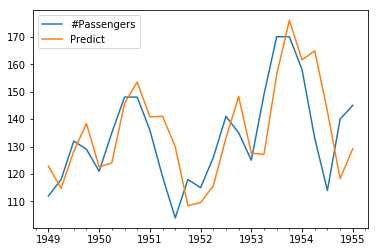

In [6]:
data['Predict']=fit1.fittedvalues
data.plot()

In [7]:
sqrt(mean_squared_error(data['#Passengers'], data['Predict']))

14.588634979634486

In [8]:
mean_absolute_error(data['#Passengers'], data['Predict'])

11.706666521374927

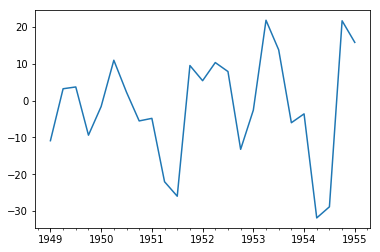

In [9]:
data['Resid']=fit1.resid
data['Resid'].plot()


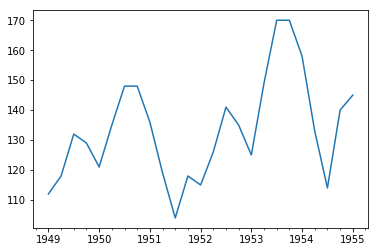

In [10]:

index=pd.date_range('1960-05-01	', periods=4, freq='Q')

datap=pd.DataFrame(fit1.forecast(8), index=index)

datap.columns=['Predict']
data['#Passengers'].plot()
datap['Predict'].plot()

In [11]:
fit1.params

{'smoothing_level': 0.894736842105263,
 'smoothing_slope': 0.05263141118822494,
 'smoothing_seasonal': 0.10526315789473684,
 'damping_slope': nan,
 'initial_level': 130.28566248678538,
 'initial_slope': 3.812487847947044,
 'initial_seasons': array([0.91630834, 0.9056245 , 0.96205307, 0.98556538]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}